### Investment 

#### Project Brief
You work for Spark Funds, an asset management company. Spark Funds wants to make investments in a few companies. The CEO of Spark Funds wants to understand the global trends in investments so that she can take the investment decisions effectively.

#### Business and Data Understanding
Spark Funds has two minor constraints for investments:

It wants to invest between 5 to 15 million USD per round of investment

It wants to invest only in English-speaking countries because of the ease of communication with the companies it would invest in

In [1]:
import pandas as pd
import numpy as np

In [2]:
companies_data = pd.read_csv("companies.csv", encoding = "ISO-8859-1")
mapping_data = pd.read_csv("mapping.csv", encoding = "ISO-8859-1")
rounds2_data = pd.read_csv("rounds2.csv", encoding = "ISO-8859-1")

In [3]:
companies_data.head()


,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [4]:
mapping_data.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


In [5]:
rounds2_data.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [6]:
#How many unique companies are present in rounds2?

rounds2_data["company_name"] = rounds2_data["company_permalink"].apply(lambda x: x.lower().replace("/organization/", ""))
rounds2_data.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,company_name
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,-fame
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN,-qounter
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0,-qounter
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0,-the-one-of-them-inc-
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,0-6-com


In [7]:

rounds2_data.company_name.drop_duplicates().size


66370

In [8]:
rounds2_data.company_name.value_counts()

solarflare                                       19
quellan                                          18
exagen-diagnostics                               18
semprius                                         18
endogastric-solutions                            17
                                                 ..
iknowl                                            1
iko                                               1
ikon-semiconductor                                1
ikonfete                                          1
ä°novatiff-reklam-ve-tanä±tä±m-hizmetleri-tic     1
Name: company_name, Length: 66370, dtype: int64

#### How many unique companies are present in rounds2?
#### Answer : 66370

In [9]:
companies_data["permalink"].apply(lambda x: x.lower().replace("/organization/", "")).value_counts()

-fame                                            1
pmedianetwork                                    1
pluristem-therapeutics                           1
plurogen-therapeutics                            1
pluromed                                         1
                                                ..
galxyz                                           1
gamaby                                           1
gamador                                          1
gamaliel                                         1
ä°novatiff-reklam-ve-tanä±tä±m-hizmetleri-tic    1
Name: permalink, Length: 66368, dtype: int64

#### How many unique companies are present in companies?
#### Answer: 66368

#### In the companies data frame, which column can be used as the unique key for each company? Write the name of the column.
#### Answer: name

In [10]:
companies_data.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [11]:
companies_data['permalink'] = companies_data["permalink"].apply(lambda x: x.lower())
companies_data.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [12]:
rounds2_data['company_permalink'] = rounds2_data["company_permalink"].apply(lambda x: x.lower())
rounds2_data.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,company_name
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,-fame
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN,-qounter
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0,-qounter
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0,-the-one-of-them-inc-
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,0-6-com


#### Are there any companies in the rounds2 file which are not present in companies? Answer yes or no: Y/N

#### Answer: Yes

In [13]:
#inp1 = inp1[~inp1['Content Rating'].isin(["Adults only 18+","Unrated"])]
rounds2_data[~(rounds2_data['company_permalink'].isin(companies_data['permalink']))].count()


company_permalink          7
funding_round_permalink    7
funding_round_type         7
funding_round_code         1
funded_at                  7
raised_amount_usd          1
company_name               7
dtype: int64

In [14]:
master_frame = pd.merge(left=rounds2_data, right=companies_data, left_on='company_permalink', right_on='permalink', how='inner')


In [15]:
master_frame.shape

(114942, 17)

#### Merge the two data frames so that all variables (columns) in the companies frame are added to the rounds2 data frame. Name the merged frame master_frame. How many observations are present in master_frame?

#### Answer: (114942, 17)

In [16]:
master_frame.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,company_name,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,-fame,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN,-qounter,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0,-qounter,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0,-the-one-of-them-inc-,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,0-6-com,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007


In [17]:
master_frame = master_frame.drop(['permalink'], axis=1)

In [18]:
master_frame = master_frame.drop(['funding_round_permalink'], axis=1)

In [19]:
master_frame.head()

,company_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,company_name,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,venture,B,05-01-2015,10000000.0,-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/organization/-qounter,venture,A,14-10-2014,NaN,-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/organization/-qounter,seed,NaN,01-03-2014,700000.0,-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
3,/organization/-the-one-of-them-inc-,venture,B,30-01-2014,3406878.0,-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
4,/organization/0-6-com,venture,A,19-03-2008,2000000.0,0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007


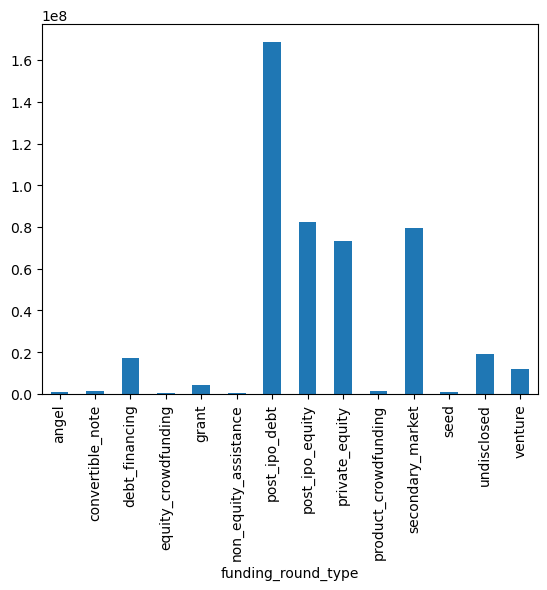

In [20]:
i1 = master_frame.groupby('funding_round_type')['raised_amount_usd'].mean().plot.bar()

In [21]:
i1 = master_frame.groupby('funding_round_type')['raised_amount_usd'].max()
i1

funding_round_type
angel                    4.945120e+08
convertible_note         1.850483e+08
debt_financing           2.127194e+10
equity_crowdfunding      2.740000e+07
grant                    7.500000e+08
non_equity_assistance    1.500000e+07
post_ipo_debt            5.800000e+09
post_ipo_equity          1.066494e+10
private_equity           4.745460e+09
product_crowdfunding     5.200000e+07
secondary_market         6.806116e+08
seed                     2.000000e+08
undisclosed              5.000000e+09
venture                  1.760000e+10
Name: raised_amount_usd, dtype: float64

In [22]:
print(master_frame.groupby('funding_round_type')['raised_amount_usd'].median())



funding_round_type
angel                      400000.0
convertible_note           272000.0
debt_financing            1100000.0
equity_crowdfunding        100000.0
grant                      201684.0
non_equity_assistance       60000.0
post_ipo_debt            19950000.0
post_ipo_equity          12262852.5
private_equity           20000000.0
product_crowdfunding       183915.0
secondary_market         32600000.0
seed                       275000.0
undisclosed               1018680.0
venture                   5000000.0
Name: raised_amount_usd, dtype: float64


In [23]:
master_frame = master_frame[master_frame['country_code'].notna()]
master_frame.head()

,company_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,company_name,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,venture,B,05-01-2015,10000000.0,-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/organization/-qounter,venture,A,14-10-2014,NaN,-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/organization/-qounter,seed,NaN,01-03-2014,700000.0,-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
4,/organization/0-6-com,venture,A,19-03-2008,2000000.0,0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
5,/organization/004-technologies,venture,NaN,24-07-2014,NaN,004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [24]:
top9 = master_frame.sort_values('raised_amount_usd', ascending=False)
top9.head(20)


,company_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,company_name,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
106557,/organization/verizon,debt_financing,NaN,28-02-2014,2.127194e+10,verizon,Verizon Communications,http://www.verizon.com/,Communications Infrastructure|Information Tech...,ipo,USA,NY,New York City,New York,07-10-1983
37567,/organization/freescale,venture,NaN,21-10-2006,1.760000e+10,freescale,Freescale Semiconductor,http://www.freescale.com,Semiconductors,ipo,USA,TX,Austin,Austin,01-01-1953
86132,/organization/sberbank,post_ipo_debt,NaN,07-07-2014,5.800000e+09,sberbank,Sberbank,http://www.sberbank.ru,Banking|Finance,ipo,RUS,48,Moscow,Moscow,NaN
75528,/organization/ping-an,private_equity,NaN,01-12-2014,4.745460e+09,ping-an,Ping An,http://www.pingan.com/,Banking|Financial Services|Insurance|Investmen...,operating,CHN,NaN,NaN,NaN,NaN
60203,/organization/mediavast,venture,B,30-06-2003,4.700000e+09,mediavast,MediaVast,NaN,Advertising|Broadcasting|Content,acquired,USA,NY,New York City,New York,01-01-1999
96023,/organization/suning,undisclosed,NaN,10-08-2015,4.630000e+09,suning,Suning,http://suning.com,Distributors|E-Commerce|Manufacturing,ipo,CHN,4,Nanjing,Nanjing,01-01-1996
106559,/organization/verizon,debt_financing,NaN,05-03-2012,3.835050e+09,verizon,Verizon Communications,http://www.verizon.com/,Communications Infrastructure|Information Tech...,ipo,USA,NY,New York City,New York,07-10-1983
106560,/organization/verizon,debt_financing,NaN,01-03-2013,3.822518e+09,verizon,Verizon Communications,http://www.verizon.com/,Communications Infrastructure|Information Tech...,ipo,USA,NY,New York City,New York,07-10-1983
45525,/organization/i-cube,undisclosed,NaN,01-01-1999,3.600000e+09,i-cube,i-Cube,NaN,Application Platforms|Customer Service|Software,ipo,USA,MA,Boston,Cambridge,NaN
35769,/organization/first-data-corporation,private_equity,NaN,03-07-2014,3.500000e+09,first-data-corporation,First Data Corporation,http://www.firstdata.com,Payments|Trading,ipo,USA,GA,Atlanta,Atlanta,01-01-1971


In [25]:
print(top9[['raised_amount_usd','country_code']])

        raised_amount_usd country_code
106557       2.127194e+10          USA
37567        1.760000e+10          USA
86132        5.800000e+09          RUS
75528        4.745460e+09          CHN
60203        4.700000e+09          USA
...                   ...          ...
114891                NaN          USA
114892                NaN          USA
114898                NaN          IND
114906                NaN          USA
114920                NaN          USA

[106271 rows x 2 columns]


In [26]:
master_frame.country_code.value_counts().head(20)

USA    72308
GBR     5966
CAN     3115
CHN     2693
IND     2233
DEU     1751
FRA     1650
ISR     1631
ESP     1235
AUS      759
IRL      726
NLD      725
SGP      721
BRA      702
SWE      675
RUS      672
JPN      642
ITA      584
CHE      565
KOR      535
Name: country_code, dtype: int64

In [27]:
ext = top9[~top9['country_code'].isin(['USA','CHN','RUS','IND'])]
ext[['raised_amount_usd','country_code']].head(30)


,raised_amount_usd,country_code
23942,1.000000e+09,KOR
12993,1.000000e+09,CAN
92039,9.150000e+08,GBR
68248,8.250000e+08,ARE
19347,8.040000e+08,HKG
69452,7.700000e+08,NLD
94354,7.500000e+08,GRD
26904,7.500000e+08,NLD
98589,7.430000e+08,ESP
84421,6.675000e+08,DEU


#### Work on mapping_data 

In [28]:
mapping_data.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


In [29]:
mapping_data.dtypes


category_list                              object
Automotive & Sports                         int64
Blanks                                      int64
Cleantech / Semiconductors                  int64
Entertainment                               int64
Health                                      int64
Manufacturing                               int64
News, Search and Messaging                  int64
Others                                      int64
Social, Finance, Analytics, Advertising     int64
dtype: object

In [30]:
mapping_data['category_list'] = mapping_data.category_list.astype('string')

In [31]:
mapping_data.dtypes

category_list                              string
Automotive & Sports                         int64
Blanks                                      int64
Cleantech / Semiconductors                  int64
Entertainment                               int64
Health                                      int64
Manufacturing                               int64
News, Search and Messaging                  int64
Others                                      int64
Social, Finance, Analytics, Advertising     int64
dtype: object

In [32]:

mapping_data.head(20)

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,<NA>,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1
5,Active Lifestyle,0,0,0,0,1,0,0,0,0
6,Ad Targeting,0,0,0,0,0,0,0,0,1
7,Advanced Materials,0,0,0,0,0,1,0,0,0
8,Adventure Travel,1,0,0,0,0,0,0,0,0
9,Advertising,0,0,0,0,0,0,0,0,1


In [33]:
mapping_data['category_list']

0                  <NA>
1                    3D
2           3D Printing
3         3D Technology
4            Accounting
             ...       
683           Wholesale
684    Wine And Spirits
685            Wireless
686               Women
687        Young Adults
Name: category_list, Length: 688, dtype: string

In [34]:
mapping_data = mapping_data.iloc[1:]

In [35]:
mapping_data.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1
5,Active Lifestyle,0,0,0,0,1,0,0,0,0


In [36]:
mapping_data['primary sector'] = mapping_data['category_list'].apply(lambda x: x.split('|')[0])


In [37]:
mapping_data.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising",primary sector
1,3D,0,0,0,0,0,1,0,0,0,3D
2,3D Printing,0,0,0,0,0,1,0,0,0,3D Printing
3,3D Technology,0,0,0,0,0,1,0,0,0,3D Technology
4,Accounting,0,0,0,0,0,0,0,0,1,Accounting
5,Active Lifestyle,0,0,0,0,1,0,0,0,0,Active Lifestyle


In [38]:
mapping_data = mapping_data.drop('Blanks', axis=1)

In [39]:
mapping_data.head()

,category_list,Automotive & Sports,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising",primary sector
1,3D,0,0,0,0,1,0,0,0,3D
2,3D Printing,0,0,0,0,1,0,0,0,3D Printing
3,3D Technology,0,0,0,0,1,0,0,0,3D Technology
4,Accounting,0,0,0,0,0,0,0,1,Accounting
5,Active Lifestyle,0,0,0,1,0,0,0,0,Active Lifestyle


In [40]:
# sectors = ['Automotive & Sports', 'Cleantech / Semiconductors', 'Entertainment', 'Health','Manufacturing', 
#            'News, Search and Messaging','Others', 'Social, Finance, Analytics, Advertising']
# conditions = [
#     (mapping_data['Automotive & Sports'] == 1),
#     (mapping_data['Cleantech / Semiconductors'] == 1),
#     (mapping_data['Entertainment'] == 1),
#     (mapping_data['Health'] == 1),
#     (mapping_data['Manufacturing'] == 1),
#     (mapping_data['News, Search and Messaging'] == 1),
#     (mapping_data['Others'] == 1),
#     (mapping_data['Social, Finance, Analytics, Advertising'] == 1)
#     ]
# mapping_data['main_sector'] = np.select(conditions, sectors)


In [41]:
mapping_data['main_sector'] = 'Others'

In [42]:
mapping_data.head()

,category_list,Automotive & Sports,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising",primary sector,main_sector
1,3D,0,0,0,0,1,0,0,0,3D,Others
2,3D Printing,0,0,0,0,1,0,0,0,3D Printing,Others
3,3D Technology,0,0,0,0,1,0,0,0,3D Technology,Others
4,Accounting,0,0,0,0,0,0,0,1,Accounting,Others
5,Active Lifestyle,0,0,0,1,0,0,0,0,Active Lifestyle,Others


In [43]:
#mapping_data.loc[mapping_data['Manufacturing'] == 1] = 'Manufacturing'
#mapping_data.head()
#df.loc[df['Event'] == 'Music', 'Genre'] = 'Rock'

In [51]:
mapping_data['main_sector'].loc[mapping_data['Manufacturing'] == 1] = 'Manufacturing'
mapping_data['main_sector'].loc[mapping_data['Cleantech / Semiconductors'] == 1 ] = 'Cleantech / Semiconductors'
mapping_data['main_sector'].loc[mapping_data['Entertainment'] == 1 ] = 'Entertainment'
mapping_data['main_sector'].loc[mapping_data['Health'] == 1 ] = 'Health'
mapping_data['main_sector'].loc[mapping_data['Automotive & Sports'] == 1 ] = 'Automotive & Sports'
mapping_data['main_sector'].loc[mapping_data['News, Search and Messaging'] == 1 ] = 'News, Search and Messaging'
#mapping_data['main_sector'].loc[mapping_data['Others'] == 1
mapping_data['main_sector'].loc[mapping_data['Social, Finance, Analytics, Advertising'] == 1 ] = 'Social, Finance, Analytics, Advertising'

/var/folders/xr/x_j1pnw55ms124rjm48zs7k00000gn/T/ipykernel_4374/3535040914.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mapping_data['main_sector'].loc[mapping_data['Manufacturing'] == 1] = 'Manufacturing'
/var/folders/xr/x_j1pnw55ms124rjm48zs7k00000gn/T/ipykernel_4374/3535040914.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mapping_data['main_sector'].loc[mapping_data['Cleantech / Semiconductors'] == 1 ] = 'Cleantech / Semiconductors'
/var/folders/xr/x_j1pnw55ms124rjm48zs7k00000gn/T/ipykernel_4374/3535040914.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame



In [52]:
mapping_data.head(10)

,category_list,Automotive & Sports,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising",primary sector,main_sector
1,3D,0,0,0,0,1,0,0,0,3D,Manufacturing
2,3D Printing,0,0,0,0,1,0,0,0,3D Printing,Manufacturing
3,3D Technology,0,0,0,0,1,0,0,0,3D Technology,Manufacturing
4,Accounting,0,0,0,0,0,0,0,1,Accounting,"Social, Finance, Analytics, Advertising"
5,Active Lifestyle,0,0,0,1,0,0,0,0,Active Lifestyle,Health
6,Ad Targeting,0,0,0,0,0,0,0,1,Ad Targeting,"Social, Finance, Analytics, Advertising"
7,Advanced Materials,0,0,0,0,1,0,0,0,Advanced Materials,Manufacturing
8,Adventure Travel,1,0,0,0,0,0,0,0,Adventure Travel,Automotive & Sports
9,Advertising,0,0,0,0,0,0,0,1,Advertising,"Social, Finance, Analytics, Advertising"
10,Advertising Exchanges,0,0,0,0,0,0,0,1,Advertising Exchanges,"Social, Finance, Analytics, Advertising"


In [ ]:
new_df = mapping_data[[]]